# 1. Introduction
TikTok users have the ability to report videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. This process generates a large number of user reports that are difficult to address quickly.

The data team of TikTok wants to develop a machine learning model to classify claims made in videos submitted to the platform by the users.

# 2. Preliminary Data Inspection 

## 2.1 Import Packages and Data

In [18]:
# Importing the relevant libraries
import numpy as np
import pandas as pd

In [19]:
# Load the dataset
data = pd.read_csv('tiktok_dataset.csv')

## 2.2 Understanding the Data

In [20]:
# Get dimensions of the dataset
data.shape

(19382, 12)

In [21]:
# Display the first 10 rows of the dataset
data.head(n=10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [22]:
# Get data types of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [23]:
# Get summary statistics of the dataset
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a colleague read in the media that butterflie...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


## 2.3 Descriptive Statistics

Since we are interested in classifying the videos as either claims or opinions, we should try to examine the `claim_status` variable.

In [24]:
# Investigate the class balance of the dataset
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

The counts are quite similar.

In [25]:
cmask = data['claim_status'] == 'claim'
claim_data = data[cmask]
claim_data['video_view_count'].agg(['mean', 'median'])

mean      501029.452748
median    501555.000000
Name: video_view_count, dtype: float64

In [26]:
omask = data['claim_status'] == 'opinion'
opinion_data = data[omask]
opinion_data['video_view_count'].agg(['mean', 'median'])

mean      4956.43225
median    4953.00000
Name: video_view_count, dtype: float64

The videos with 'claim' status have much higher view counts and engagement than the videos with 'opinion' status.

In [27]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

The number of banned authors from claim videos are significantly higher than banned authors from opinion videos. A potential explanation could be claims being reported are penalised more than opinions.

We will now investigate the `author_ban_status` variable.

In [28]:
data.groupby(['author_ban_status']).agg({
    'video_view_count': ['mean', 'median'],
    'video_like_count': ['mean', 'median'],
    'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [29]:
# Group by author_ban_status and calculate the median of video_share_count
data.groupby(['author_ban_status']).agg({'video_share_count': 'median'})

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


The videos of banned authors being shared are much higher than active users. This suggests the possibility of the videos containing controversial content and hence gathered more engagement.

In [30]:
data.groupby(['author_ban_status']).agg({'video_view_count': ['count','mean', 'median'],
    'video_like_count': ['count','mean', 'median'],
    'video_share_count': ['count','mean', 'median']})

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

Banned and under review users have higher views, likes, and shares than active users. The mean values are significantly higher than median, suggesting outlier videos with very high engagement. 

In [31]:
# Create likes per view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create comments per view column
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create shares per view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

data.groupby(['claim_status', 'author_ban_status']).agg({
    'likes_per_view': ['count','mean', 'median'],
    'comments_per_view': ['count','mean', 'median'],
    'shares_per_view': ['count','mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

Previously, we know that banned and under review authors have higher views, likes, and shares than active authors. Now, a video's engagement rate seem to be more related to its `claim_status` than `author_ban_status`.

We also knew that claim videos have more views than opinion videos. This result tells claim videos also have a higher rate of likes as well as comments and shares on average, so they are more well received.

# 3. Exploratory Data Analysis

In [32]:
# Import packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Histogram of Video Duration')

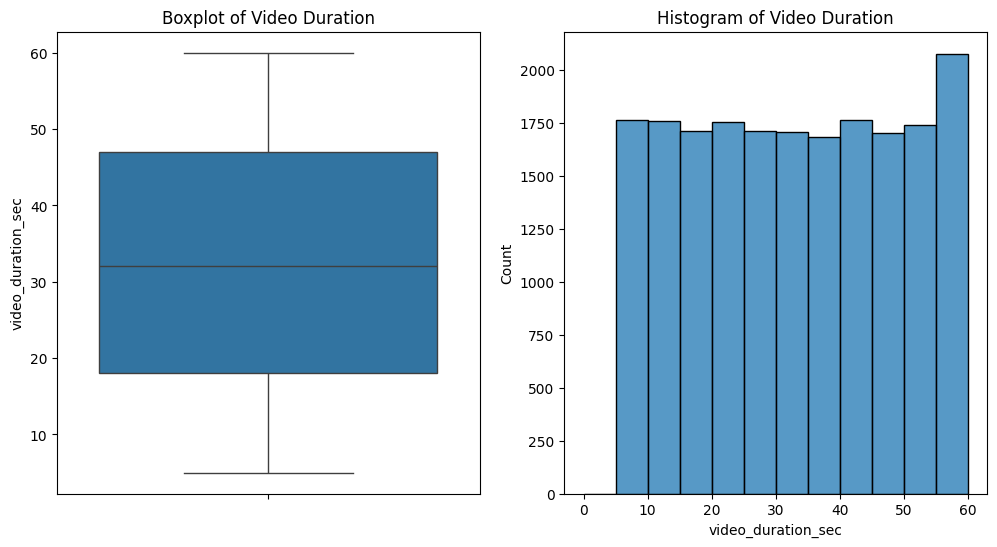

In [ ]:
# Create a boxplot for `video_duration_sec`
# Create a histogram for `video_duration_sec`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_duration_sec'], ax = ax[0])
ax[0].set_title('Boxplot of Video Duration')
sns.histplot(data['video_duration_sec'], bins = range(0, 61, 5), ax = ax[1])
ax[1].set_title('Histogram of Video Duration')

The videos are 5-60 seconds long, has a median around 32 seconds, and uniformly distributed.

Text(0.5, 1.0, 'Histogram of Video View Count')

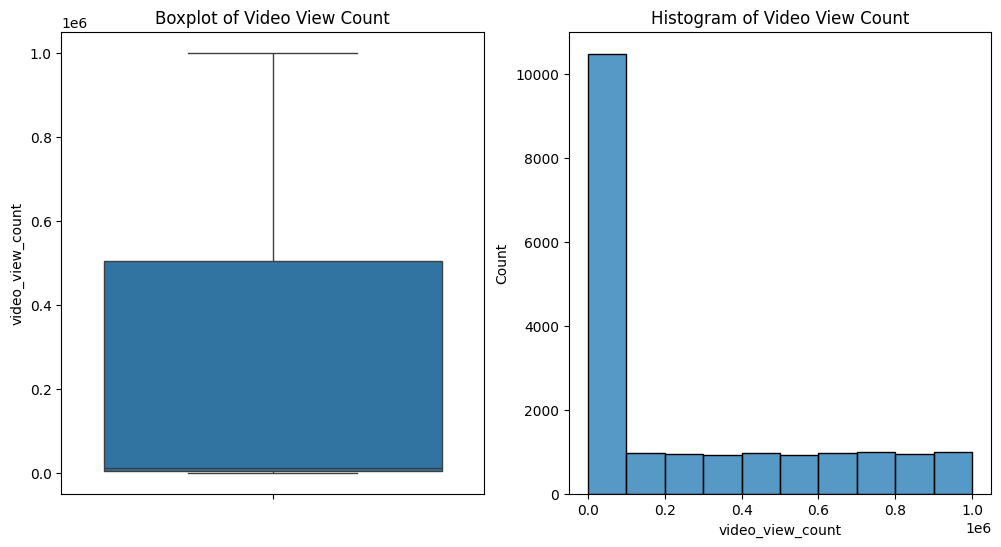

In [ ]:
# Create a boxplot for `video_view_count`
# Create a histogram for `video_view_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_view_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video View Count')
sns.histplot(data['video_view_count'], bins = range(0, 1000001, 100000), ax = ax[1])
ax[1].set_title('Histogram of Video View Count')

The distribution of the `video_view_count` variable is positively skewed. There are some videos with more than one million views, but majority of the videos received less than 100,000 views.

Text(0.5, 1.0, 'Histogram of Video Like Count')

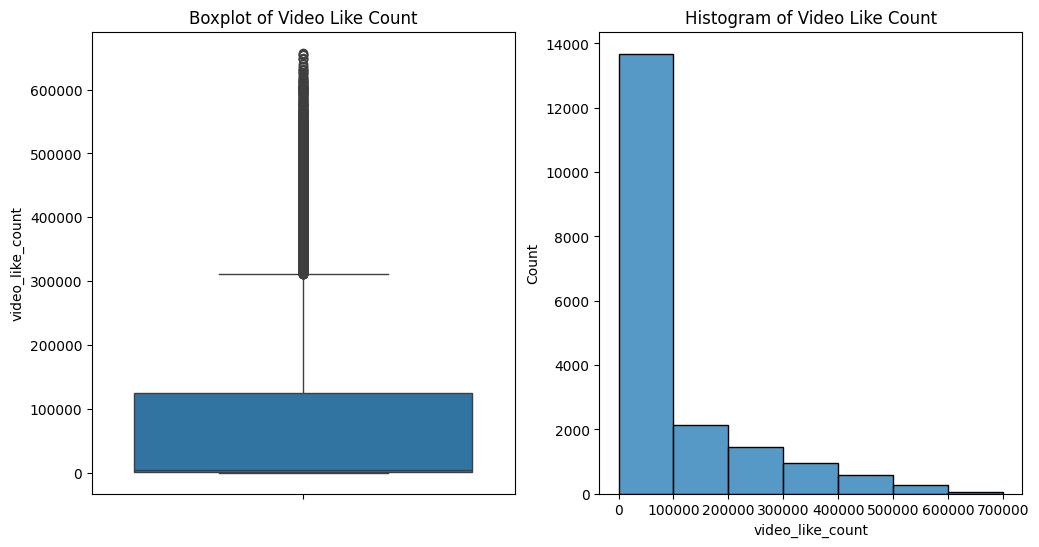

In [ ]:
# Create a boxplot and histogram for `video_like_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_like_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video Like Count')
sns.histplot(data['video_like_count'], bins = range(0, 7*10**5+1, 1*10**5), ax = ax[1])
ax[1].set_title('Histogram of Video Like Count')

Text(0.5, 1.0, 'Histogram of Video Comment Count')

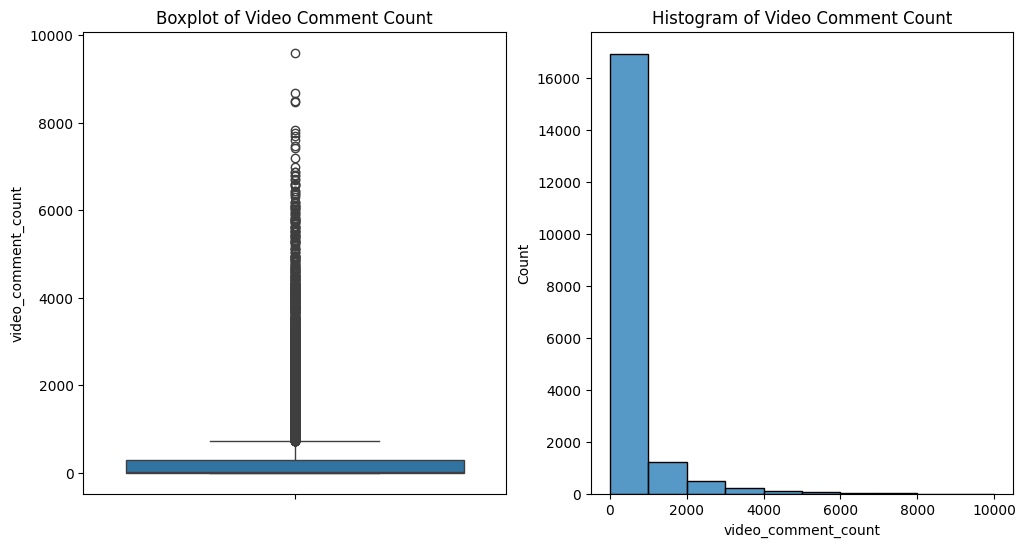

In [ ]:
# Create a boxplot and histogram for `video_comment_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_comment_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video Comment Count')
sns.histplot(data['video_comment_count'], bins = range(0, 10001, 1000), ax = ax[1])
ax[1].set_title('Histogram of Video Comment Count')

Text(0.5, 1.0, 'Histogram of Video Share Count')

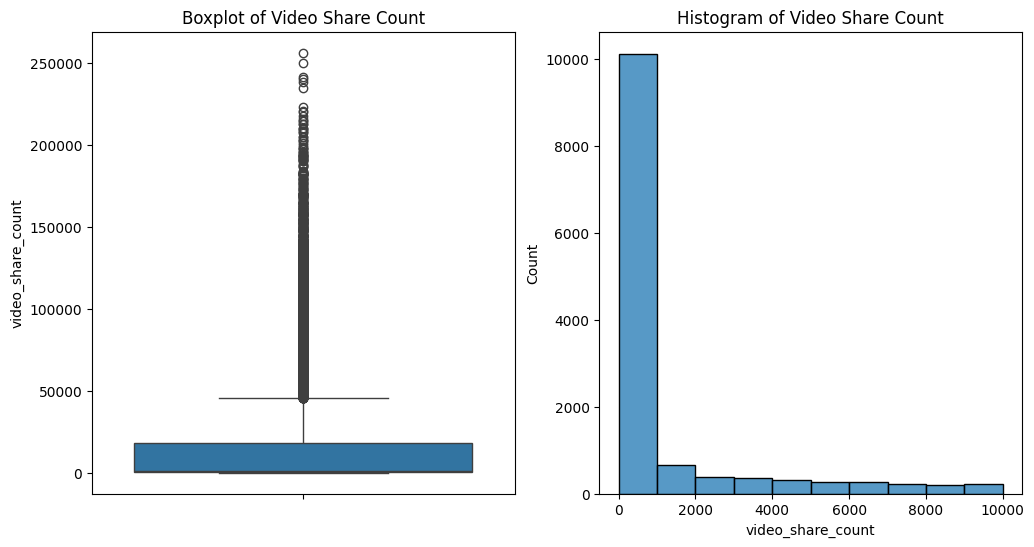

In [47]:
# Create a boxplot and histogram for `video_share_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_share_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video Share Count')
sns.histplot(data['video_share_count'], bins = range(0, 10001, 1000), ax = ax[1])
ax[1].set_title('Histogram of Video Share Count')

Text(0.5, 1.0, 'Histogram of Video Download Count')

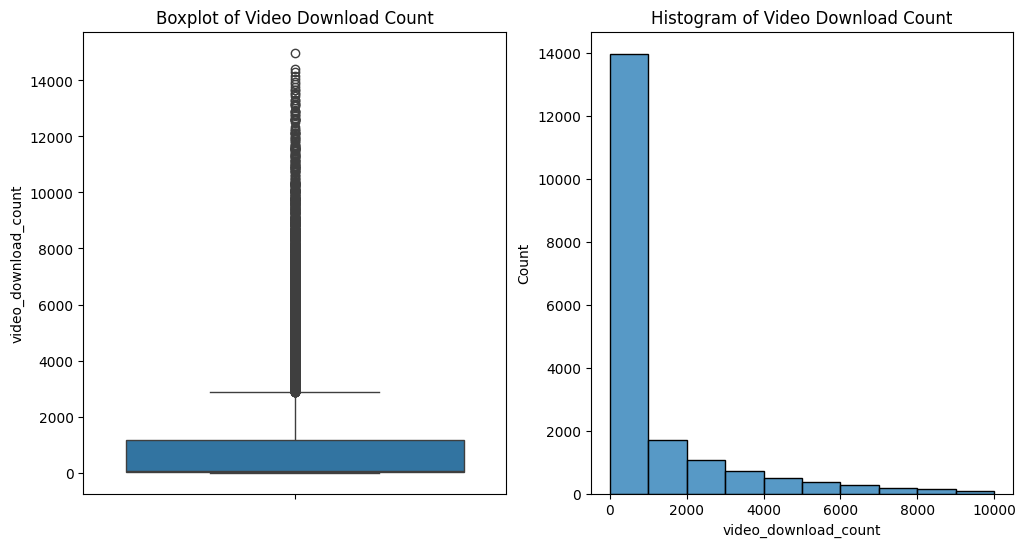

In [48]:
# Create a boxplot and histogram for `video_download_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_download_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video Download Count')
sns.histplot(data['video_download_count'], bins = range(0, 10001, 1000), ax = ax[1])
ax[1].set_title('Histogram of Video Download Count')

The variables `video_like_count`, `video_comment_count`, `video_share_count`, and `video_download_count` all demonstrated similar properties:
* Contain extreme values
* Positively skewed

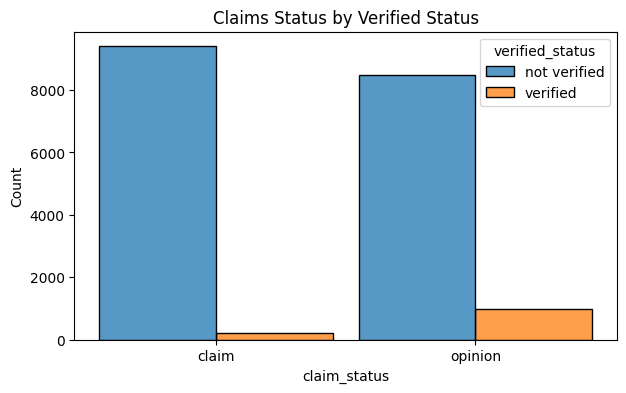

In [ ]:
plt.figure(figsize = (7, 4))
sns.histplot(data = data,
             x = 'claim_status',
             hue = 'verified_status',
             multiple = 'dodge',
             shrink = 0.9)
plt.title('Claims Status by Verified Status')
plt.show()

It is evident that majority of the reported videos are from unverified authors but a verified user seem to be more likely to post opinions than claims.

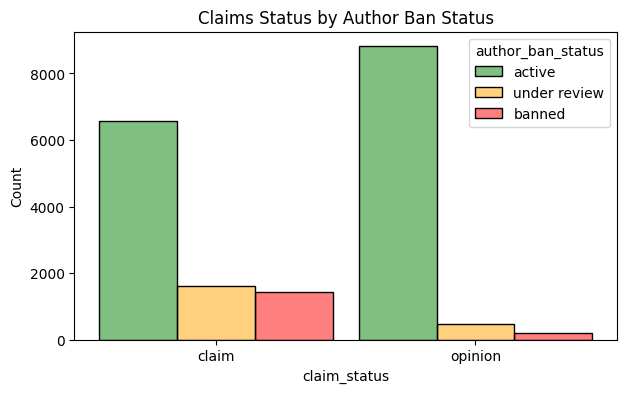

In [56]:
# Create a histogram of claim status by author ban status
plt.figure(figsize=(7, 4))
sns.histplot(data = data,
             x = 'claim_status',
             hue = 'author_ban_status',
             multiple = 'dodge',
             hue_order = ['active', 'under review', 'banned'],
             palette = {'active': 'green', 'under review': 'orange', 'banned': 'red'},
             alpha = 0.5,
             shrink = 0.9)
plt.title('Claims Status by Author Ban Status')
plt.show()

Fewer active authors report claims than opinions but banned and under review authors are more likely to post claims than opinions.

# 4. Data Exploration and Hypothesis Testing

# 5. Regression Modeling

# 6. Classifying Videos with Machine Learning